outlier detection

In [5]:
import numpy as np
import pandas as pd

In [2]:
marks=[12,45,89,25,45,0,41,89,100,25,42,45,60,26,65,64,66,68,71,72,71,74,76,77,79,84,85,81,87,98,95,91,92,36,59,3,2,-200,540,620]
marks.sort()
print(marks)

minimum, q1, median, q3, maximum = np.quantile(marks,[0, 0.25, 0.5, 0.75, 1])

print("Minimum ", minimum,"\nQ1 :",q1,"\nMedian",median,"\nQ3 : ",q3,"\nMaximun ",maximum)

[-200, 0, 2, 3, 12, 25, 25, 26, 36, 41, 42, 45, 45, 45, 59, 60, 64, 65, 66, 68, 71, 71, 72, 74, 76, 77, 79, 81, 84, 85, 87, 89, 89, 91, 92, 95, 98, 100, 540, 620]
Minimum  -200.0 
Q1 : 41.75 
Median 69.5 
Q3 :  85.5 
Maximun  620.0


In [3]:
IQR=q3-q1
print("IQR   ",IQR)

lowerfrc=q1-1.5*IQR

higherfrc=q3+1.5*IQR

print("lower :: ",lowerfrc," higher  ::",higherfrc)

IQR    43.75
lower ::  -23.875  higher  :: 151.125


<Axes: >

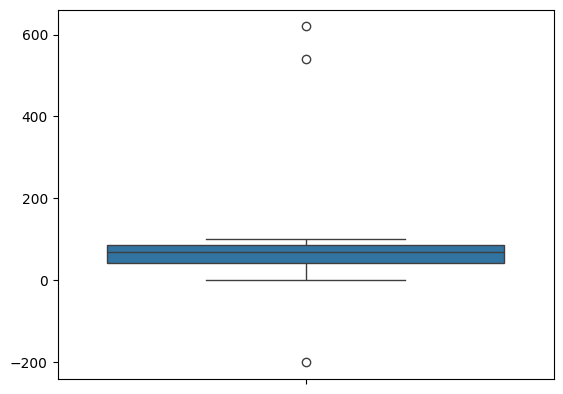

In [4]:
import seaborn as sns
sns.boxplot(marks)

one hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({'color':['red','blue','green','red','blue']})
df


,color
0,red
1,blue
2,green
3,red
4,blue


In [12]:
encoder=OneHotEncoder()  #create an instance of Onehotencoder
encoder.fit_transform(df[['color']]).toarray()

# encoded=encoder.fit_transform(df[['color']]).toarray()


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [13]:
encoded=encoder.fit_transform(df[['color']]).toarray()

enccoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

enccoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [14]:
pd.concat([df,enccoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


Lable encoding

In [15]:
df=pd.DataFrame({'color':['red','blue','green','red','blue']})
df

,color
0,red
1,blue
2,green
3,red
4,blue


In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lbl=LabelEncoder()
lbl.fit_transform(df[['color']])


e:\DS-ML-NLP\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 2, 0])

In [22]:
lbl.transform([['red']])
lbl.transform([['green']])
lbl.transform([['blue']])

e:\DS-ML-NLP\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
e:\DS-ML-NLP\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
e:\DS-ML-NLP\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [24]:
# ordinal encoding
# give some rank
# high school 1
# college 2
# graduate 3
# post graduate  4

from sklearn.preprocessing import OrdinalEncoder


df=pd.DataFrame({'size':['small','mediam','small','large','small']})
df


,size
0,small
1,mediam
2,small
3,large
4,small


In [25]:
ordinalencoder=OrdinalEncoder(categories=[['small','mediam','large']])
ordinalencoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [0.],
       [2.],
       [0.]])

In [26]:
aa=ordinalencoder.fit_transform(df[['size']])
df['RANK']=aa
df

,size,RANK
0,small,0.0
1,mediam,1.0
2,small,0.0
3,large,2.0
4,small,0.0
